# Semantic Segmentation

In [34]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [7]:
import os
import cv2
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

In [2]:
data_path='./dataset/data'
gt_path='./dataset/groundtruth'

In [3]:
X = []
Y = []
for file in os.scandir(data_path):
    gt_im_path=os.path.join(gt_path, "imgy"+file.name.split('x')[1])
    print(file.path,gt_im_path)
    im = cv2.imread(file.path)
    im = cv2.resize(im,(248,248))/255
    gt = cv2.imread(gt_im_path)
    gt = cv2.resize(gt,(248,248))/255
    X.append(im)
    Y.append(gt)
    
X = np.array(X).reshape((-1,248,248,3))
Y = np.array(Y).reshape((-1,248,248,3))

print(X.shape)
print(Y.shape)

./dataset/data\imgx1.jpg ./dataset/groundtruth\imgy1.jpg
./dataset/data\imgx10.jpg ./dataset/groundtruth\imgy10.jpg
./dataset/data\imgx11.jpg ./dataset/groundtruth\imgy11.jpg
./dataset/data\imgx12.jpg ./dataset/groundtruth\imgy12.jpg
./dataset/data\imgx13.jpg ./dataset/groundtruth\imgy13.jpg
./dataset/data\imgx14.jpg ./dataset/groundtruth\imgy14.jpg
./dataset/data\imgx15.jpg ./dataset/groundtruth\imgy15.jpg
./dataset/data\imgx16.jpg ./dataset/groundtruth\imgy16.jpg
./dataset/data\imgx17.jpg ./dataset/groundtruth\imgy17.jpg
./dataset/data\imgx18.jpg ./dataset/groundtruth\imgy18.jpg
./dataset/data\imgx19.jpg ./dataset/groundtruth\imgy19.jpg
./dataset/data\imgx2.jpg ./dataset/groundtruth\imgy2.jpg
./dataset/data\imgx20.jpg ./dataset/groundtruth\imgy20.jpg
./dataset/data\imgx21.jpg ./dataset/groundtruth\imgy21.jpg
./dataset/data\imgx22.jpg ./dataset/groundtruth\imgy22.jpg
./dataset/data\imgx23.jpg ./dataset/groundtruth\imgy23.jpg
./dataset/data\imgx24.jpg ./dataset/groundtruth\imgy24.jpg
.

In [4]:
batch_size = 64
epochs = 120
inChannel = 3
x, y = 248, 248
input_img = Input(shape = (x, y, inChannel))
conv1 = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

#decoder
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2) # 14 x 14 x 64
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv6) # 28 x 28 x 1

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 248, 248, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 248, 248, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 32)       

In [ ]:
tf.keras.utils.plot_model

In [80]:
autoencoder_train = autoencoder.fit(X, Y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/120
1/1 [==============================] - 12s 12s/step - loss: 0.2455
Epoch 2/120
1/1 [==============================] - 2s 2s/step - loss: 0.1668
Epoch 3/120
1/1 [==============================] - 2s 2s/step - loss: 0.1663
Epoch 4/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 5/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 6/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 7/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 8/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 9/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 10/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 11/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 12/120
1/1 [==============================] - 2s 2s/step - loss: 0.2175
Epoch 13/120
1/1 [==============================] - 2s 2s/step - loss: 

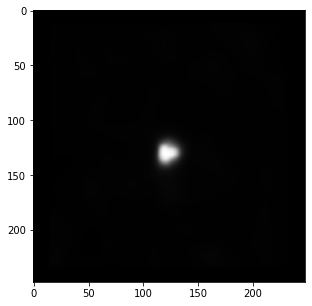

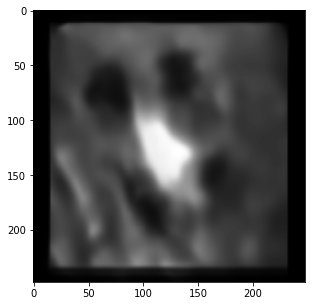

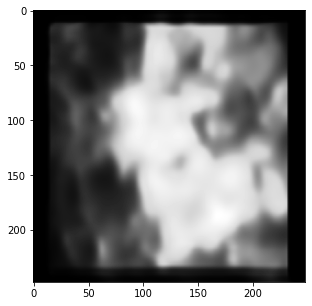

In [85]:
from matplotlib import pyplot as plt
image=autoencoder.predict(X[:3])
for i in range(3):
    plt.figure(figsize=[5, 5])
    curr_img = np.reshape(image[i], (248,248))
    plt.imshow(curr_img,cmap='gray')
    plt.show()

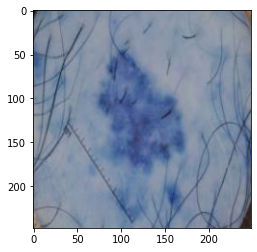

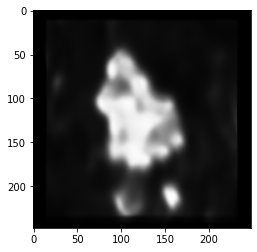

In [84]:
im = cv2.imread('dataset/imgx61.jpg')
img = cv2.resize(im,(248,248))/255
img=img.reshape(-1,248,248,3)
plt.imshow(img[0])
plt.show()
out=autoencoder.predict(img)
out = np.reshape(out[0], (248,248))


plt.imshow(out,cmap='gray')
plt.show()

